# Stack Overflow

## Introduction 

In this assignment, we will use some posts on Stack Overflow during the year of 2015 and measure the similarity of  users by looking at their answers' score. In order to get a full grade, do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and is due on **September 29**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs). You might need to install the *requests* library and an easy way to do so is by using the command [pip](https://docs.python.org/3/installing/index.html).

In [25]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00
max_pages = 100

# response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" + "&pageNo=" + str(page_no))
#                         "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
#                         "&order=asc&sort=creation&site=stackoverflow")

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                    "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                    "&order=asc&sort=creation&site=stackoverflow")

print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [26]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":230,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"https://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":247,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"https://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":920,"answer_count":1,"score":1,"last_activity_dat

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it. JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object syntax, which is commonly used for representing and transmitting data on web sites. More documentation on json objects can be found [here](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON) 

In [49]:
import json
json_response = response.json()

print(json.dumps(json_response, indent=1))
#print(json_response["has_more"])

{
 "quota_max": 300,
 "quota_remaining": 298,
 "has_more": true,
 "items": [
  {
   "is_answered": true,
   "accepted_answer_id": 27727478,
   "owner": {
    "display_name": "salep",
    "link": "https://stackoverflow.com/users/3210431/salep",
    "user_type": "registered",
    "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
    "reputation": 230,
    "accept_rate": 78,
    "user_id": 3210431
   },
   "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
   "answer_count": 2,
   "creation_date": 1420070458,
   "view_count": 247,
   "question_id": 27727385,
   "title": "Inserting multiple records into MySQL from an array",
   "tags": [
    "php",
    "mysql",
    "arrays",
    "mysqli"
   ],
   "score": 0,
   "last_activity_date": 1420071815
  },
  {
   "is_answered": false,
   "answer_count": 1,
   "owner": {
    "display_name": "Balpreet Pankaj",
    "link": "https://stackoverflow.com/users/868779/balpreet-pankaj"

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates and whether the question was answered. Your solution should be in the form **(creation_date,is_answered)**. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [54]:
def print_creation_dates_is_answered_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    
    creation_date = [item['creation_date'] for item in response.json()['items']] 
    is_answered = [item['is_answered'] for item in response.json()['items']] 
    new_response = creation_date, is_answered
    return creation_date, is_answered

creation_date, is_answered = print_creation_dates_is_answered_json(response)
for i in range(len(creation_date)):
    print((creation_date[i],is_answered[i]))


(1420070458, True)
(1420070503, False)
(1420070552, True)
(1420070577, True)
(1420070611, True)
(1420070641, False)
(1420070703, False)
(1420070727, True)
(1420070734, True)
(1420070777, False)
(1420070801, True)
(1420070848, True)
(1420070859, True)
(1420070866, False)
(1420070968, True)
(1420071005, False)
(1420071029, True)
(1420071103, True)
(1420071122, True)
(1420071175, True)
(1420071184, False)
(1420071212, False)
(1420071230, False)
(1420071340, True)
(1420071431, True)
(1420071530, True)
(1420071736, False)
(1420071794, True)
(1420071830, True)
(1420071868, False)
(1420071907, True)
(1420071929, True)
(1420071939, True)
(1420072002, False)
(1420072021, False)
(1420072074, True)
(1420072129, False)
(1420072243, True)
(1420072342, True)
(1420072354, True)
(1420072397, False)
(1420072430, True)
(1420072455, False)
(1420072481, True)
(1420072610, True)
(1420072638, True)
(1420072667, True)
(1420072685, True)
(1420072777, False)
(1420072779, True)
(1420072902, True)
(1420072924, T

Write the code that calls the ```print_creation_dates_is_answered_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). This means that after getting a request, you will need to wait for some seconds before making a new request. If you do not do that, stack exchange will block you from making any new requests. **(5 pts)**

In [52]:
import requests
from datetime import datetime
import time as tm


start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00
hs_more = True
page_no = 1

while(hs_more):
    new_response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" + 
                    "&pageNo=" + str(page_no) + "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                    "&order=asc&sort=creation&site=stackoverflow")
    
    
    n_response = new_response.json() 
    hs_more = n_response["has_more"]
    tm.sleep(2)
    page_no+=1
    print('*'*100)
    creation_date, is_answered = print_creation_dates_is_answered_json(new_response)
    for i in range(len(creation_date)):
        print((creation_date[i],is_answered[i]))
        

****************************************************************************************************
(1420070458, True)
(1420070503, False)
(1420070552, True)
(1420070577, True)
(1420070611, True)
(1420070641, False)
(1420070703, False)
(1420070727, True)
(1420070734, True)
(1420070777, False)
(1420070801, True)
(1420070848, True)
(1420070859, True)
(1420070866, False)
(1420070968, True)
(1420071005, False)
(1420071029, True)
(1420071103, True)
(1420071122, True)
(1420071175, True)
(1420071184, False)
(1420071212, False)
(1420071230, False)
(1420071340, True)
(1420071431, True)
(1420071530, True)
(1420071736, False)
(1420071794, True)
(1420071830, True)
(1420071868, False)
(1420071907, True)
(1420071929, True)
(1420071939, True)
(1420072002, False)
(1420072021, False)
(1420072074, True)
(1420072129, False)
(1420072243, True)
(1420072342, True)
(1420072354, True)
(1420072397, False)
(1420072430, True)
(1420072455, False)
(1420072481, True)
(1420072610, True)
(1420072638, True)
(14200726

KeyError: 'has_more'

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing) for Stack Overflow's posts in 2015. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. Your solution should work with the whole dataset.

Do not commit the data file to your github. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions and answers posted in 2015. Questions are posts with `PostTypeId=1` and answers are posts with `PostTypeId=2`. Then: 
1. Make a `pandas DataFrame` with the following 7 columns: `Id`, `CreationDate`, `OwnerUserId`, the first tag in `Tags`, `ViewCount`, `Score`, `Type`. Note that the first 3 columns are common for both questions and answers, the following 2 are only identified in questions and the next column in answers. Finally column `Type` is used show whether the row of the data frame corresponds to a question or answer. You can assign 'Q' for question and 'A' for answer to this column. Also, if you do not have a value for a column, for instance an answer does not have a view count, then simply add None as a value.   
2. Print out the time required to parse the questions (data file).
3. Print out the DataFrame.
4. Do not clear the output. 
**(10 pts)**

Some hints/library you might find useful are the following:
1. One library you can use to parse the large .xml file is the `xml.etree.ElementTree` library. More documentation can be found [here](https://docs.python.org/2/library/xml.etree.elementtree.html).
2. Due to the required parsing time, it is strongly recommended that you write the parsed data in another file on the disk. Thus, even if something goes wrong you will always have these data to work with, which will give you partial credit.
3. Before traversing the whole dataset, play with a small subset first in order to construct your solution fast.



In [2]:
# File imports
import xml.etree.ElementTree as ET
import pandas as pd
import pandas_datareader.data as web
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import numpy as np
from collections import defaultdict

In [5]:
# Functions
t1 = datetime.now()


tree = 'stackoverflow-posts.xml'
questiondf = []
answerdf = [] 

for events, elem in ET.iterparse(tree, events=("start", "end")):
    question = defaultdict(dict)
    answer = defaultdict(dict)
    try: 
        if events == "start":
            if elem.attrib['PostTypeId']=='1': 
                
                question['Id'] = (elem.attrib['Id'])
                question['CreationDate']=(elem.attrib['CreationDate'])
                question['OwnerUserId']=(elem.attrib['OwnerUserId'])
                question['Tags']=(elem.attrib['Tags'].split('>')[0][1:])
                question['ViewCount']=(elem.attrib['ViewCount'])
                question['Score']= None
                question['Type']=('Q')
                questiondf.append(question)
            
            if elem.attrib['PostTypeId']=='2':
                answer['Id'] = (elem.attrib['Id'])
                answer['CreationDate']=(elem.attrib['CreationDate'])
                answer['OwnerUserId']=(elem.attrib['OwnerUserId'])
                answer['Tags']= None
                answer['ViewCount']= None
                answer['Score']=(elem.attrib['Score'])
                answer['Type']= ('A')
                questiondf.append(answer)
            
    except: None


df = DataFrame(questiondf)
df_a = DataFrame(answerdf)
print(df)
#df.to_csv('parse_data.csv')

t2 = datetime.now()
print(t2-t1)

                CreationDate        Id OwnerUserId Score            Tags Type  \
0    2015-11-06T19:15:39.243  33574052      361684     2            None    A   
1    2015-11-06T19:15:43.610  33574053     1175788  None             sql    Q   
2    2015-11-06T19:15:45.407  33574054     2204722     1            None    A   
3    2015-11-06T19:15:49.623  33574055     1059070     3            None    A   
4    2015-11-06T19:16:02.383  33574057     1636329  None          spring    Q   
5    2015-11-06T19:16:04.647  33574058     4936744  None        openmdao    Q   
6    2015-11-06T19:16:06.353  33574059     1000934     1            None    A   
7    2015-11-06T19:16:16.680  33574060     2589179     0            None    A   
8    2015-11-06T19:16:31.293  33574061     5404226  None             c++    Q   
9    2015-11-06T19:16:32.447  33574062     3958374  None        three.js    Q   
10   2015-11-06T19:16:35.487  33574063     4231521     1            None    A   
11   2015-11-06T19:16:38.193

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the highest answer scores. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [7]:
t1 = datetime.now()

tree = 'stackoverflow-posts.xml'
answerdfa = []
questiondfq = []       
for events, elem in ET.iterparse(tree, events=("start", "end")):
    answera = defaultdict(dict)
    questiona = defaultdict(dict) 
    try:
        if events == "start":
            if elem.attrib['PostTypeId']=='1':    
                questiona['Id'] = (elem.attrib['Id'])
                questiona['CreationDate']=(elem.attrib['CreationDate'])
                questiona['OwnerUserId']=(elem.attrib['OwnerUserId'])
                questiona['Tags']=(elem.attrib['Tags'].split('>')[0][1:])
                questiona['ViewCount']=(elem.attrib['ViewCount'])
                questiona['Score']= None
                questiona['Type']=('Q')
                questiondfq.append(questiona)
    
            if elem.attrib['PostTypeId']=='2':
                #answer['Id'] = (elem.attrib['Id'])
                #answer['CreationDate']=(elem.attrib['CreationDate'])
                answera['OwnerUserId']=(elem.attrib['OwnerUserId'])
                #answer['Tags']= None
                #answer['ViewCount']= None
                answera['Score']=(elem.attrib['Score'])
                answer['Type']= ('A')
                answera['ParentId']=(elem.attrib['ParentId'])
                answerdfa.append(answera)            
    except: None

        
        
# ###################################################################
# #Getting Top Hundred Users
# ###################################################################

df_a = DataFrame(answerdfa)
df_q = DataFrame(questiondfq)
df_a['Score'] = df_a['Score'].astype(int)
#df_a['ParentId'] = df_a['ParentId'].astype(obj)
#gb = df_a[['OwnerUserId','Score','ParentId']]
gb = df_a.groupby(['OwnerUserId']).sum()[['Score']].reset_index()
#gb = df_a.sum()[['Score']]
#print(gb)


gb = gb.sort_values(['Score'], axis=0, ascending=False)
gb = gb.head(n=100)

print("Top Hundred Users Sorted with Scores")
print(gb)
print("##############################################################")
top_id = gb['OwnerUserId'].tolist()
#print(top_id)


###################################################################
#Getting Parent Ids of Top Hundred Users
###################################################################

top_user_parent_ids = { 'userId': None, 'parentIdList': None }
for myId in top_id:
    condition = df_a['OwnerUserId'] == myId
    wanted_rows = df_a[condition]
    parent_ids = wanted_rows['ParentId'].tolist()
    top_user_parent_ids[myId] = parent_ids
    #print(parent_ids)

print("Parent Ids of Top Hundred Users")
print(top_user_parent_ids)
print("##############################################################")
# #[top_user_parent_ids.get(values) for value in values]

# ##################################################################
# #Getting Tags of Top Hundred Users
# ###################################################################

df_tags = df_q[['Id','Tags']]
#print(df_tags)
top_user_tags = { 'userId': None, 'Tags': None }
for myId in top_id:
    parent_ids = top_user_parent_ids[myId]
    for parent_id in parent_ids:
        condition = df_tags['Id'] == parent_id
        #print(df_tags['Id'].dtype)
        wanted_rows = df_tags[condition]
        #print(wanted_rows)
        tags = wanted_rows['Tags'].tolist()
        #print("UserId: ", myId)
        #print("\tParentId: ", parent_id)
        #print("\t\tTags: ", tags)
        top_user_tags[myId] = tags
        #print(top_user_tags[myId])
        
print("Tags of Top Hundred Users")
print(top_user_tags.values())
print("##############################################################")


#################################################################
#Getting Distance Matrix of Top Hundred Users
##################################################################

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(top_user_tags)
X = X.toarray()
#print(X)
dtm = euclidean_distances(X)

print("Distance Matrix of Top Hundred Users")
print(dtm)
print("##############################################################")

t2 = datetime.now()
print(t2-t1)
print("##############################################################")


#df[df.IDs.isin( iterable bag of parent IDs IDs belonging to the same user )].Tags." ".join

Top Hundred Users Sorted with Scores
    OwnerUserId  Score
77         3191     17
163      794088     13
21      1394631      7
166      845568      7
25      1426788      7
40      1971096      6
81      3379653      5
100     3877338      5
33      1627406      4
82      3382056      4
54      2227834      4
119     4386559      4
88      3523490      3
103     3925941      3
26      1445366      3
70      2911458      3
5       1059070      3
8       1144035      3
4       1043683      3
80      3283069      2
29      1491895      2
116     4362545      2
37         1810      2
1       1004312      2
6       1116364      2
123      446279      2
92       361684      2
130     4773663      2
132     4851590      2
56      2274694      2
..          ...    ...
20      1366219      1
48      2141139      1
52      2204722      1
46      2085504      1
43      2078780      1
57       229371      1
16      1291150      1
58      2295657      1
50       214994      1
30      1515819     

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(5 pts)**

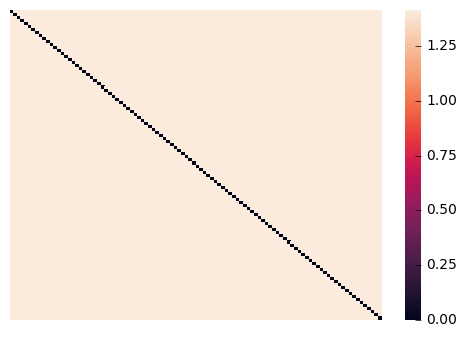

In [18]:
import matplotlib.pyplot as plt
#plot=sns.heatmap(distmat, xticklabels= False, yticklabels=False)
ax = sns.heatmap(dtm, xticklabels=False, yticklabels=False)
plt.show()

Provide an interpretation of the heatmap's results in the following markdown cell. **(5 pts)**

In [27]:
The heatmap results show the the similarity of different users based on the type of questions they answer. 
and there are visible variations in which type of questions a user answers

-----------------